In [1]:
# Imports
import numpy as np
import pandas as pd
from datetime import date

Provided Data URLs





In [2]:
# Rwandan Government Village Data
site_assessment = 'https://raw.githubusercontent.com/Lord-Kanzler/Labs25_B2P/master/data/raw/B2P_Rwanda_Site_Assessment_Data.csv'
 

# Bridges to Prosperity Rwanda Data
names_codes = 'https://raw.githubusercontent.com/Lord-Kanzler/Labs25_B2P/master/data/raw/Rwanda_Administrative_Levels_and_Codes_Province_through_Village.csv'


In [3]:
# Loading data
site_assessment = pd.read_csv(site_assessment)
print(site_assessment.shape)
site_assessment.head(20)


(1472, 27)


,Country,Province,District,Sector,Cell,Bridge Site Name,Project Stage,Project Sub-Stage,Project Code,Bridge Type,Span (m),GPS (Latitude),GPS (Longitude),Individuals Directly Served,Form: Form Name,Community Served 1,Community Served 2,Community Served 3,Community Served 4,Community Served 5,Community Served 6,Community Served 7,Community Served 8,Community Served 9,Community Served 10,CaseSafeID Form,Bridge Opportunity: Opportunity ID
0,Rwanda,Western Province,Rusizi,Giheke,Gakomeye,Buzi,Rejected,Technical,1014107,Suspended,NaN,-2.420560,28.966200,NaN,Project Assessment - 2018.10.29,Buzi,Kabuga,Kagarama,Gacyamo,Gasheke,NaN,NaN,NaN,NaN,NaN,a1if1000002e51bAAA,006f100000d1fk1
1,Rwanda,Western Province,Rusizi,Giheke,Gakomeye,Kamigisha,Rejected,Technical,1014106,Suspended,NaN,-2.424860,28.957260,NaN,Project Assessment - 2018.10.29,Kabuga,Buzi,Gacyamo - Gasheke,Kagarama,Kanoga,NaN,NaN,NaN,NaN,NaN,a1if1000002e51WAAQ,006f100000d1fjw
2,Rwanda,Northern Province,Rulindo,Buyoga,Gahororo-Gipfundo,Gipfundo,Rejected,Technical,1007651,Suspended,8.0,-1.720530,30.081240,NaN,Project Assessment - 2018.8.11,Gapfundo,Rusabira ( Gicumbi),Merezo,Minanire,Karutongo,NaN,NaN,NaN,NaN,NaN,a1if10000025nz8AAA,006f100000a86I3
3,Rwanda,Northern Province,Gicumbi,Kageyo,Kabuga/gatobotobo,Nyarubande,Rejected,NaN,1012493,Other,NaN,-1.655950,30.078840,NaN,Project Assessment - 2018.8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if10000025nzDAAQ,006f100000cPpL8
4,Rwanda,Southern Province,Kamonyi,Kayenzi,Kirwa,Gisizi,Identified,Requested,1014318,Suspended,NaN,-1.870868,29.877686,NaN,Project Assessment - 2018.11.15,Gisizi,Nyabitare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002gMwRAAU,006f100000eescb
5,Rwanda,Southern Province,Kamonyi,Kayenzi,Kirwa,Ruheka,Rejected,Technical,1014319,Suspended,NaN,-1.883957,29.850548,NaN,Project Assessment - 2018.11.15,Ruheka,Kabana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002gMwqAAE,006f100000eescl
6,Rwanda,Southern Province,Kamonyi,Ngamba,Kabuga,Raro,Rejected,Technical,1014327,NaN,NaN,-1.896261,29.951448,NaN,Project Assessment - 2018.11.15,Raro,Kamuhoza( Runda sector),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002gMxUAAU,006f100000eesdZ
7,Rwanda,Southern Province,Kamonyi,Karama,Bitare,Kinkeri,Rejected,Technical,1014324,NaN,NaN,-1.977729,29.850108,NaN,Project Assessment - 2018.11.15,Kinkeri( karama sector ),Musambira sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002gMxFAAU,006f100000eesdK
8,Rwanda,Southern Province,Kamonyi,Karama,Bunyonga,Nyenyeri,Rejected,Technical,1014321,Suspension,NaN,-1.939737,29.843622,NaN,Project Assessment - 2018.11.15,Nyenyeri,Bunyonga,Kavumu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002gMx0AAE,006f100000eescv
9,Rwanda,Southern Province,Kamonyi,Gacurabwenge,Gihinga,Karama,Rejected,Technical,1014325,Suspended,NaN,-1.980126,29.905502,NaN,Project Assessment - 2018.11.15,Karama,Kagarama,Ryabitana,Nyarunyinya,"Gahira cell, karama sector and kayenzi",NaN,NaN,NaN,NaN,NaN,a1if1000002gMxKAAU,006f100000eesdP


In [4]:
site_assessment[site_assessment['Bridge Site Name'] == 'Kabeza']

,Country,Province,District,Sector,Cell,Bridge Site Name,Project Stage,Project Sub-Stage,Project Code,Bridge Type,Span (m),GPS (Latitude),GPS (Longitude),Individuals Directly Served,Form: Form Name,Community Served 1,Community Served 2,Community Served 3,Community Served 4,Community Served 5,Community Served 6,Community Served 7,Community Served 8,Community Served 9,Community Served 10,CaseSafeID Form,Bridge Opportunity: Opportunity ID
108,Rwanda,Eastern Province,Nyagatare,Rukomo,RukomaII-Rurenge,Kabeza,Rejected,Technical,1014389,Suspension,NaN,-1.364320,30.281940,NaN,Project Assessment - 2018.11.18,Kabeza,Rebero,Nyanjye,Biryogo,Rwiju,NaN,NaN,NaN,NaN,NaN,a1if1000002gbOHAAY,006f100000eeuzO
112,Rwanda,Eastern Province,Nyagatare,Gatunda,Cyagaju-Rwesheke,Kabeza,Rejected,Technical,1014394,Suspension,NaN,-1.408150,30.189856,NaN,Project Assessment - 2018.11.18,Kabeza,Rwesheke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002gbQmAAI,006f100000eeuzn
141,Rwanda,Eastern Province,Ngoma,Kibungo-Rurenge,Karenge-Musya(Kabeza-Rwasaburo),Kabeza,Rejected,Technical,1014383,Suspended,NaN,-2.144405,30.531062,NaN,Project Assessment - 2018.11.18,Karenge,Musya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002gbMGAAY,006f100000eeuyu
1165,Rwanda,Western Province,Rusizi,Giheke,Cyendajuru,Kabeza,Rejected,Technical,1014142,Suspended,NaN,-2.461690,28.964750,NaN,Project Assessment - 2018.10.29,Kabeza,Burembo,Karambo,Kibakure,Murinzi,NaN,NaN,NaN,NaN,NaN,a1if1000002e6lHAAQ,006f100000d1hKH
1320,Rwanda,Western Province,Rutsiro,Mushonyi,Magaba/gakomeye,Kabeza,Rejected,Technical,1013660,Suspension,NaN,-1.877220,29.319444,NaN,Project Assessment - 2018.9.27,Gakomeye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002Yt0HAAS,006f100000d7iZh
1427,Rwanda,Eastern Province,Kayonza,Mwili,Nyamugari,Kabeza,Rejected,Technical,1013704,Suspension,NaN,-1.890130,30.611390,NaN,Project Assessment - 2018.9.28,Kabeza,Kigarama,Gasarabwayi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a1if1000002YtTBAA0,006f100000d7jCe


In [5]:
site_assessment.columns.to_list()

['Country',
 'Province',
 'District',
 'Sector',
 'Cell',
 'Bridge Site Name',
 'Project Stage',
 'Project Sub-Stage',
 'Project Code',
 'Bridge Type',
 ' Span (m)',
 ' GPS (Latitude)',
 'GPS (Longitude)',
 'Individuals Directly Served',
 'Form: Form Name',
 'Community Served 1',
 'Community Served 2',
 'Community Served 3',
 'Community Served 4',
 'Community Served 5',
 'Community Served 6',
 'Community Served 7',
 'Community Served 8',
 'Community Served 9',
 'Community Served 10',
 'CaseSafeID Form',
 'Bridge Opportunity: Opportunity ID']

In [6]:
# Which columns are no digital.
site_assessment.select_dtypes(exclude="number").columns.tolist()

['Country',
 'Province',
 'District',
 'Sector',
 'Cell',
 'Bridge Site Name',
 'Project Stage',
 'Project Sub-Stage',
 'Project Code',
 'Bridge Type',
 'Form: Form Name',
 'Community Served 1',
 'Community Served 2',
 'Community Served 3',
 'Community Served 4',
 'Community Served 5',
 'CaseSafeID Form',
 'Bridge Opportunity: Opportunity ID']

In [7]:
# Which columns are digital for  combining Community Served colummns. Only same kind of  columns we can do this operation.
site_assessment.select_dtypes(include="number").columns.tolist()

[' Span (m)',
 ' GPS (Latitude)',
 'GPS (Longitude)',
 'Individuals Directly Served',
 'Community Served 6',
 'Community Served 7',
 'Community Served 8',
 'Community Served 9',
 'Community Served 10']

In [8]:
# We need convert 'Community Served 6', 'Community Served 7','Community Served 8',  'Community Served 9' from number to object same as "Community Served 1"
site_assessment['Community Served 6'] = site_assessment['Community Served 6'].apply(str)
site_assessment['Community Served 7'] = site_assessment['Community Served 7'].apply(str)
site_assessment['Community Served 8'] = site_assessment['Community Served 8'].apply(str)
site_assessment['Community Served 9'] = site_assessment['Community Served 9'].apply(str)
site_assessment['Community Served 10'] = site_assessment['Community Served 10'].apply(str)

In [9]:
#To see what content of "Community Served 1" has?
site_assessment['Community Served 1'].value_counts() 

Murambi       13
Gasharu       12
Kabeza        10
Gatare         9
Karambi        8
              ..
Agahama        1
Nyaburanga     1
Kamatsira      1
Mazinga        1
Gishenyi       1
Name: Community Served 1, Length: 963, dtype: int64

In [10]:
#Merge 'Community Served 1' with 'Community Served 2' and so on, to create the new  column 'Community_served'.

site_assessment['Community_merged1'] = site_assessment['Community Served 1'].str.cat(site_assessment['Community Served 2'],sep=", ")
site_assessment['Community_merged2'] = site_assessment['Community_merged1'].str.cat(site_assessment['Community Served 3'],sep=", ")
site_assessment['Community_merged3'] = site_assessment['Community_merged2'].str.cat(site_assessment['Community Served 4'],sep=", ")
site_assessment['Community_served'] = site_assessment['Community_merged3'].str.cat(site_assessment['Community Served 5'],sep=", ")

In [ ]:
# remove the columns I created


In [11]:
#result of new  column 'Community_served' we created 
site_assessment['Community_served'].head()

0             Buzi, Kabuga, Kagarama, Gacyamo, Gasheke
1    Kabuga, Buzi, Gacyamo - Gasheke, Kagarama, Kanoga
2    Gapfundo, Rusabira ( Gicumbi), Merezo, Minanir...
3                                                  NaN
4                                                  NaN
Name: Community_served, dtype: object

In [32]:
site_assessment=site_assessment.drop(['Community_merged1', 'Community_merged2', 'Community_merged3'], axis=1)

In [33]:
# site_assessment['Form: Form Name'].replace('Form', inplace = True)
# site_assessment[' GPS (Latitude)'].replace('GPS (Latitude)', inplace = True)
site_assessment.rename(columns={'Form: Form Name': 'Form', ' GPS (Latitude)': 'GPS (Latitude)'})

,Country,Province,District,Sector,Cell,Bridge Site Name,Project Stage,Project Sub-Stage,Project Code,Bridge Type,Span (m),GPS (Latitude),GPS (Longitude),Individuals Directly Served,Form,Community Served 1,Community Served 2,Community Served 3,Community Served 4,Community Served 5,Community Served 6,Community Served 7,Community Served 8,Community Served 9,Community Served 10,CaseSafeID Form,Bridge Opportunity: Opportunity ID,Community_served
0,Rwanda,Western Province,Rusizi,Giheke,Gakomeye,Buzi,Rejected,Technical,1014107,Suspended,0.0,-2.420560,28.966200,0.0,Project Assessment - 2018.10.29,Buzi,Kabuga,Kagarama,Gacyamo,Gasheke,nan,nan,nan,nan,nan,a1if1000002e51bAAA,006f100000d1fk1,"Buzi, Kabuga, Kagarama, Gacyamo, Gasheke"
1,Rwanda,Western Province,Rusizi,Giheke,Gakomeye,Kamigisha,Rejected,Technical,1014106,Suspended,0.0,-2.424860,28.957260,0.0,Project Assessment - 2018.10.29,Kabuga,Buzi,Gacyamo - Gasheke,Kagarama,Kanoga,nan,nan,nan,nan,nan,a1if1000002e51WAAQ,006f100000d1fjw,"Kabuga, Buzi, Gacyamo - Gasheke, Kagarama, Kanoga"
2,Rwanda,Northern Province,Rulindo,Buyoga,Gahororo-Gipfundo,Gipfundo,Rejected,Technical,1007651,Suspended,8.0,-1.720530,30.081240,0.0,Project Assessment - 2018.8.11,Gapfundo,Rusabira ( Gicumbi),Merezo,Minanire,Karutongo,nan,nan,nan,nan,nan,a1if10000025nz8AAA,006f100000a86I3,"Gapfundo, Rusabira ( Gicumbi), Merezo, Minanir..."
3,Rwanda,Northern Province,Gicumbi,Kageyo,Kabuga/gatobotobo,Nyarubande,Rejected,NaN,1012493,Other,0.0,-1.655950,30.078840,0.0,Project Assessment - 2018.8.11,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,a1if10000025nzDAAQ,006f100000cPpL8,NaN
4,Rwanda,Southern Province,Kamonyi,Kayenzi,Kirwa,Gisizi,Identified,Requested,1014318,Suspended,0.0,-1.870868,29.877686,0.0,Project Assessment - 2018.11.15,Gisizi,Nyabitare,NaN,NaN,NaN,nan,nan,nan,nan,nan,a1if1000002gMwRAAU,006f100000eescb,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,Rwanda,Southern Province,Kamonyi,Kigarama,Cyanya,Kigende,Rejected,Technical,1014340,NaN,0.0,-2.362459,30.642264,0.0,Project Assessment - 2018.11.16,Kigende,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,a1if1000002gQmoAAE,006f100000eessj,NaN
1468,Rwanda,Eastern Province,Rwamagana,Nyakariro - Nzige,Bihembe - Kayibanda,Kabere,Rejected,Technical,1014543,Suspension,0.0,-2.043770,30.294420,0.0,Project Assessment - 2018.11.26,Kabere,Kanyangese,Ruvomo (Nzige),Ruvomo (Muyumbu),NaN,nan,nan,nan,nan,nan,a1if1000002hCg7AAE,006f100000ef88s,NaN
1469,Rwanda,Western Province,Ngororero,Muhororo,Between Gashonyi and Murambi,Gasumo,Rejected,Technical,1012543,Suspension,0.0,-1.885970,29.658680,0.0,Project Assessment - 2018.8.4,Murambi,Gashonyi,Gasovu,NaN,NaN,nan,nan,nan,nan,nan,a1if10000025YQ3AAM,006f100000dhpCR,NaN
1470,Rwanda,Western Province,Ngororero,Muhororo-Ngororero,Gasovu -Rwambarira,Gasovu,Rejected,Technical,1012544,Suspension,0.0,-1.885970,29.651000,0.0,Project Assessment - 2018.8.4,Gasovu,Murambi,Gashonyi,Nyabigogoro,Rwambariro,nan,nan,nan,nan,nan,a1if10000025YRBAA2,006f100000dhpCW,"Gasovu, Murambi, Gashonyi, Nyabigogoro, Rwamba..."


In [13]:
site_assessment['Province'].value_counts()

Western Province     503
Southern Province    428
Northern Province    265
Eastern Province     220
Kigali                56
Name: Province, dtype: int64

In [14]:
site_assessment['Project Sub-Stage'].value_counts()

Technical                         1104
Requested                          158
Identified in Needs Assessment      57
In Service                          39
Social                              38
Local Investment                     4
Name: Project Sub-Stage, dtype: int64

In [15]:
site_assessment.describe()

,Span (m),GPS (Latitude),GPS (Longitude),Individuals Directly Served
count,408.000000,1468.000000,1468.000000,51.000000
mean,52.356127,-2.040594,29.678262,2264.078431
std,81.732121,0.469244,1.601779,3170.876774
min,4.000000,-2.799865,-29.496450,0.000000
25%,17.000000,-2.346920,29.440095,0.000000
50%,35.500000,-2.056546,29.672200,1720.000000
75%,58.000000,-1.740733,29.983409,3120.000000
max,850.000000,2.794150,30.813100,17270.000000


In [16]:
names_codes = pd.read_csv(names_codes)
print(names_codes.shape)
names_codes.head(20)


(14816, 12)


,Prov_ID,Province,Dist_ID,District,Sect_ID,Sector,Cell_ID,Cell,Vill_ID,Village,Status,FID
0,2,Amajyepfo,22,Gisagara,2205,Kigembe,220501,Agahabwa,22050101,Agahehe,Rural,1842
1,2,Amajyepfo,22,Gisagara,2205,Kigembe,220501,Agahabwa,22050102,Kabacuzi,Rural,1846
2,2,Amajyepfo,22,Gisagara,2205,Kigembe,220501,Agahabwa,22050103,Kamutozo,Rural,1854
3,2,Amajyepfo,22,Gisagara,2205,Kigembe,220501,Agahabwa,22050104,Kamweko,Rural,1866
4,2,Amajyepfo,22,Gisagara,2205,Kigembe,220501,Agahabwa,22050105,Nyamabuye,Rural,1873
5,2,Amajyepfo,22,Gisagara,2205,Kigembe,220501,Agahabwa,22050106,Ruhuha,Rural,1881
6,2,Amajyepfo,22,Gisagara,2205,Kigembe,220501,Agahabwa,22050107,Taba,Rural,1887
7,5,Iburasirazuba,53,Gatsibo,5307,Kiziguro,530701,Agakomeye,53070110,Nyungwe,Rural,12067
8,5,Iburasirazuba,53,Gatsibo,5307,Kiziguro,530701,Agakomeye,53070111,Ubutatu,Rural,12076
9,5,Iburasirazuba,53,Gatsibo,5307,Kiziguro,530701,Agakomeye,53070101,Agatovu,Rural,12319


In [17]:
names_codes.columns.to_list()

['Prov_ID',
 'Province',
 'Dist_ID',
 'District',
 'Sect_ID',
 'Sector',
 'Cell_ID',
 'Cell',
 'Vill_ID',
 'Village',
 'Status',
 'FID']

In [18]:
names_codes['Province'].replace('Iburasirazuba', 'Eastern Province', inplace = True)

In [19]:
# Local Province Names
names_codes['Province'].value_counts()

Eastern Province    3791
Iburengerazuba      3617
Amajyepfo           3501
Amajyaruguru        2744
Umujyi wa Kigali    1163
Name: Province, dtype: int64

In [20]:
# English Province Names
site_assessment['Province'].value_counts()

Western Province     503
Southern Province    428
Northern Province    265
Eastern Province     220
Kigali                56
Name: Province, dtype: int64

In [21]:
# Create dataframe copy
names_codes = names_codes.copy()

In [22]:
## Province Translations - names_codes
# Iburasirazuba = Eastern Province
# Iburengerazuba = Western Province
# Amajyepfo = Southern Province
# Amajyaruguru = Northern Province
# Umujyi wa Kigali = Kigali

'''This matches the names from site_assessment to names_codes using the same 
"Province" header to ease mapping'''

names_codes['Province'].replace('Iburasirazuba', 'Eastern Province', inplace = True)
names_codes['Province'].replace('Iburengerazuba', 'Western Province', inplace = True)
names_codes['Province'].replace('Amajyepfo', 'Southern Province', inplace = True)
names_codes['Province'].replace('Amajyaruguru', 'Northern Province', inplace = True)
names_codes['Province'].replace('Umujyi wa Kigali', 'Kigali', inplace = True)
print(names_codes.head(20))
print(names_codes['Province'].value_counts())

    Prov_ID           Province  Dist_ID  ...      Village  Status    FID
0         2  Southern Province       22  ...      Agahehe   Rural   1842
1         2  Southern Province       22  ...     Kabacuzi   Rural   1846
2         2  Southern Province       22  ...     Kamutozo   Rural   1854
3         2  Southern Province       22  ...      Kamweko   Rural   1866
4         2  Southern Province       22  ...    Nyamabuye   Rural   1873
5         2  Southern Province       22  ...       Ruhuha   Rural   1881
6         2  Southern Province       22  ...         Taba   Rural   1887
7         5   Eastern Province       53  ...      Nyungwe   Rural  12067
8         5   Eastern Province       53  ...      Ubutatu   Rural  12076
9         5   Eastern Province       53  ...      Agatovu   Rural  12319
10        5   Eastern Province       53  ...     Akabingo   Rural  12326
11        5   Eastern Province       53  ...    Akingondo   Rural  12334
12        5   Eastern Province       53  ...     Bi

In [23]:
# Checking for NaNs
site_assessment.isnull().sum()

Country                                  0
Province                                 0
District                                 0
Sector                                   3
Cell                                    51
Bridge Site Name                         0
Project Stage                            0
Project Sub-Stage                       72
Project Code                             0
Bridge Type                            177
 Span (m)                             1064
 GPS (Latitude)                          4
GPS (Longitude)                          4
Individuals Directly Served           1421
Form: Form Name                          0
Community Served 1                      97
Community Served 2                     208
Community Served 3                     598
Community Served 4                     828
Community Served 5                    1070
Community Served 6                       0
Community Served 7                       0
Community Served 8                       0
Community S

In [24]:
# Cleaning NaNs - site_assessment
site_assessment = site_assessment.copy() # Create copy

# Renaming Columns
site_assessment = site_assessment.rename(columns = {' Span (m)' : 'Span (m)'})

# site_assessment['Span (m)']
'''A Span = 0 effectively means no bridge, the intention is to keep numeric column consistant '''

site_assessment['Span (m)'].replace(np.NaN, 0, inplace = True)
print( site_assessment['Span (m)'].value_counts())

# site_assessment['Individuals Directly Served']
'''Individuals Directly served = 0 means no bridge provided, the intention is to keep numeric column consistant '''

site_assessment['Individuals Directly Served'].replace(np.NaN, 0, inplace = True)
print(site_assessment['Individuals Directly Served'].value_counts())



0.0      1064
10.0       24
35.0       22
40.0       18
45.0       15
         ... 
110.0       1
850.0       1
133.0       1
33.7        1
31.0        1
Name: Span (m), Length: 101, dtype: int64
0.0        1437
1000.0        2
5800.0        2
1530.0        1
2505.0        1
1768.0        1
4100.0        1
7000.0        1
3450.0        1
2865.0        1
1260.0        1
825.0         1
1945.0        1
2400.0        1
800.0         1
100.0         1
320.0         1
4200.0        1
2030.0        1
4111.0        1
1750.0        1
3440.0        1
4288.0        1
12500.0       1
2600.0        1
1970.0        1
2015.0        1
1195.0        1
1720.0        1
2354.0        1
17270.0       1
3375.0        1
1852.0        1
4330.0        1
Name: Individuals Directly Served, dtype: int64


In [25]:
site_assessment['Community Served 10'].replace(np.NaN, "", inplace = True)
print(site_assessment['Community Served 10'].value_counts())

nan    1472
Name: Community Served 10, dtype: int64


In [26]:
site_assessment.isnull().sum()

Country                                  0
Province                                 0
District                                 0
Sector                                   3
Cell                                    51
Bridge Site Name                         0
Project Stage                            0
Project Sub-Stage                       72
Project Code                             0
Bridge Type                            177
Span (m)                                 0
 GPS (Latitude)                          4
GPS (Longitude)                          4
Individuals Directly Served              0
Form: Form Name                          0
Community Served 1                      97
Community Served 2                     208
Community Served 3                     598
Community Served 4                     828
Community Served 5                    1070
Community Served 6                       0
Community Served 7                       0
Community Served 8                       0
Community S

In [27]:
# ## Data Output in .csv

# # Getting current date to keep track of dataset changes
# date = date.today()
# print("Today's date:", date)

# # site_assessment
# filename_site_assessment = f'B2P_Rwanda_Site_Assessment_Data_clean_{date}.csv'

# # names_codes
# filename_names_codes = f'Rwanda_Administrative_Levels_and_Codes_Province_through_Village_clean_{date}.csv'

# # Dataframe to .csv conversion
# site_assessment.to_csv(filename_site_assessment)
# names_codes.to_csv(filename_names_codes)

# # Placeholder for merged dataset
# #merged.to_csv('merged.csv')

In [28]:
# # Testing f-string file name assembly
# date = date.today()
# print("Today's date:", date)

# # site_assessment
# Filename_site_assessment = f'B2P_Rwanda_Site_Assessment_Data_clean_{date}.csv'
# Filename_site_assessment

['Rejected' 'Identified' 'Complete' 'Confirmed' 'Prospecting'
 'Under Construction']


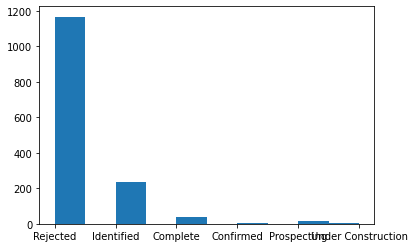

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import random
from statistics import mean, stdev
print(site_assessment['Project Stage'].unique())
plt.hist(site_assessment['Project Stage']);

In [34]:
site_assessment.head(
)

,Country,Province,District,Sector,Cell,Bridge Site Name,Project Stage,Project Sub-Stage,Project Code,Bridge Type,Span (m),GPS (Latitude),GPS (Longitude),Individuals Directly Served,Form: Form Name,Community Served 1,Community Served 2,Community Served 3,Community Served 4,Community Served 5,Community Served 6,Community Served 7,Community Served 8,Community Served 9,Community Served 10,CaseSafeID Form,Bridge Opportunity: Opportunity ID,Community_served
0,Rwanda,Western Province,Rusizi,Giheke,Gakomeye,Buzi,Rejected,Technical,1014107,Suspended,0.0,-2.420560,28.966200,0.0,Project Assessment - 2018.10.29,Buzi,Kabuga,Kagarama,Gacyamo,Gasheke,nan,nan,nan,nan,nan,a1if1000002e51bAAA,006f100000d1fk1,"Buzi, Kabuga, Kagarama, Gacyamo, Gasheke"
1,Rwanda,Western Province,Rusizi,Giheke,Gakomeye,Kamigisha,Rejected,Technical,1014106,Suspended,0.0,-2.424860,28.957260,0.0,Project Assessment - 2018.10.29,Kabuga,Buzi,Gacyamo - Gasheke,Kagarama,Kanoga,nan,nan,nan,nan,nan,a1if1000002e51WAAQ,006f100000d1fjw,"Kabuga, Buzi, Gacyamo - Gasheke, Kagarama, Kanoga"
2,Rwanda,Northern Province,Rulindo,Buyoga,Gahororo-Gipfundo,Gipfundo,Rejected,Technical,1007651,Suspended,8.0,-1.720530,30.081240,0.0,Project Assessment - 2018.8.11,Gapfundo,Rusabira ( Gicumbi),Merezo,Minanire,Karutongo,nan,nan,nan,nan,nan,a1if10000025nz8AAA,006f100000a86I3,"Gapfundo, Rusabira ( Gicumbi), Merezo, Minanir..."
3,Rwanda,Northern Province,Gicumbi,Kageyo,Kabuga/gatobotobo,Nyarubande,Rejected,NaN,1012493,Other,0.0,-1.655950,30.078840,0.0,Project Assessment - 2018.8.11,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,a1if10000025nzDAAQ,006f100000cPpL8,NaN
4,Rwanda,Southern Province,Kamonyi,Kayenzi,Kirwa,Gisizi,Identified,Requested,1014318,Suspended,0.0,-1.870868,29.877686,0.0,Project Assessment - 2018.11.15,Gisizi,Nyabitare,NaN,NaN,NaN,nan,nan,nan,nan,nan,a1if1000002gMwRAAU,006f100000eescb,NaN


In [31]:
# 'CaseSafeID Form' is unique for every row.do we can use it as index?
site_assessment['CaseSafeID Form'].value_counts()

a1if10000023mXKAAY    1
a1if1000002YMFPAA4    1
a1if1000002Yu8dAAC    1
a1if1000002YAILAA4    1
a1if1000002ViVyAAK    1
                     ..
a1if1000002mK5gAAE    1
a1if10000025YTWAA2    1
a1if1000002n1MKAAY    1
a1if1000002e4bjAAA    1
a1if1000002YAGAAA4    1
Name: CaseSafeID Form, Length: 1472, dtype: int64